# HomeWork 8
**DeadLine : 23:59 29 Aban 1400**

**Total points : 100pts**

# 1. Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Make your costome dataset   
 **یادآوری:** این بلوک فقط یکبار اجرا شود تا دیتاست در گوگل درایو ذخیره شود
 از دفعه دوم نیازی به اجرای آن بلوک نیست
 

## 2.1. Download dataset using google scraping

download and install google scraping tools:

In [13]:
!git clone https://github.com/Joeclinton1/google-images-download.git
!cd /content/google-images-download/ && python setup.py install

fatal: destination path 'google-images-download' already exists and is not an empty directory.
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing google_images_download.egg-info/PKG-INFO
writing dependency_links to google_images_download.egg-info/dependency_links.txt
writing entry points to google_images_download.egg-info/entry_points.txt
writing requirements to google_images_download.egg-info/requires.txt
writing top-level names to google_images_download.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'google_images_download.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.lin

costom dataset config:

In [14]:
!echo '{"Records": [{"keywords": "car","limit": 60,"size": "medium","print_urls": true},{"keywords": "bird","limit": 60,"size": "medium","print_urls": true},{"keywords": "Leopard","limit": 60,"size": "medium","print_urls": true},{"keywords": "cat","limit": 60,"size": "medium","print_urls": true},{"keywords": "dog","limit": 60,"size": "medium","print_urls": true}]}' > dataset.json

download 40-50 image for each category
maybe take 2 or 3 minute ...

In [15]:
!googleimagesdownload -cf dataset.json


Item no.: 1 --> Item name = car
Evaluating...
Starting Download...
Image URL: https://www.extremetech.com/wp-content/uploads/2019/12/SONATA-hero-option1-764A5360-edit-640x354.jpg
Completed Image ====> 1.sonata-hero-option1-764a5360-edit-640x354.jpg
Image URL: https://imageio.forbes.com/specials-images/imageserve/5d35eacaf1176b0008974b54/2020-Chevrolet-Corvette-Stingray/0x0.jpg?format=jpg&crop=4560,2565,x790,y784,safe&width=960
Completed Image ====> 2.0x0.jpg
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2019-honda-civic-sedan-1558453497.jpg?crop=1xw:0.9997727789138833xh;center,top&resize=480:*
Completed Image ====> 3.2019-honda-civic-sedan-1558453497.jpg
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2022-chevrolet-corvette-z06-1607016574.jpg?crop=0.737xw:0.738xh;0.181xw,0.218xh&resize=640:*
Completed Image ====> 4.2022-chevrolet-corvette-z06-1607016574.jpg
Image URL: https://www.enterprise.com/content/dam/global-vehicle-images/cars/F

## 2.2 Splite data To train set && test set

In [16]:
import os
import shutil
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']

os.makedirs('./test/')
for category in categories:
    os.makedirs('./test/'+category)
os.rename('./downloads', './train')

FileExistsError: ignored

In [17]:
import os
import shutil

categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    src_files = os.listdir(src)
    print(len(src_files))
    i=0
    for file_name in src_files:
        if i > (0.2*(len(src_files))):
            break
        full_file_name = os.path.join(src, file_name)
        if os.path.isfile(full_file_name):
            shutil.move(full_file_name, dest)
        i+=1
        


FileNotFoundError: ignored

In [18]:
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


FileNotFoundError: ignored

## 2.2. Copy Training data to Google Drive

In [19]:
import os
import shutil
try:
  destination='/content/drive/MyDrive/HW7_Dataset/'
  if not os.path.isdir(destination):
      os.makedirs(destination)
  shutil.move('./train/', destination)
  shutil.move('./test/', destination)
except:
  print("file already exist")


file already exist


In [20]:
for category in categories:
    src=destination+'./train/'+category
    dest=destination+'./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  0
bird test imagess:  67
bird test images:  0
car test imagess:  67
car test images:  0
cat test imagess:  83
cat test images:  0
dog test imagess:  85
dog test images:  0


# 3. Load Dataset From Google Drive

In [5]:
import os

In [9]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']

import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
os.system('cp -r '+destination+'train/'+ ' ./')
os.system('cp -r '+destination+'test1/'+ ' ./')


256

In [10]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  0
bird test imagess:  67
bird test images:  0
car test imagess:  67
car test images:  0
cat test imagess:  83
cat test images:  0
dog test imagess:  85
dog test images:  0


# 4. Generator

In [11]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 16
train_datagen = ImageDataGenerator(
    rotation_range=25,
    vertical_flip=True,
    horizontal_flip=True,
    shear_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split= 0.1,
    fill_mode="wrap"

)
test_datagen = ImageDataGenerator()
train_datagen_wo_agum = ImageDataGenerator(validation_split= 0.1)

train_dir=os.path.normpath('./train')

train_generator = train_datagen.flow_from_directory(train_dir,seed=42, batch_size=batch_size, subset='training',class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(train_dir,seed=42, batch_size=batch_size, subset='validation',class_mode='categorical')
#with out agumation
train_wo_agum = train_datagen_wo_agum.flow_from_directory(train_dir,seed=42, subset='training',class_mode='categorical', batch_size=batch_size)
validation_generator_wo_agum = train_datagen_wo_agum.flow_from_directory(train_dir,seed=42, subset='validation',class_mode='categorical', batch_size=batch_size)
#test
test_generator = test_datagen.flow_from_directory('./test',seed=42, batch_size=1)


Found 292 images belonging to 5 classes.
Found 31 images belonging to 5 classes.
Found 292 images belonging to 5 classes.
Found 31 images belonging to 5 classes.
Found 0 images belonging to 5 classes.


In [12]:
x, y=train_generator.__getitem__(1)
print(x.shape)
print(y.shape)

(16, 256, 256, 3)
(16, 5)


In [13]:
import os
from PIL import Image
folder_path = './train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


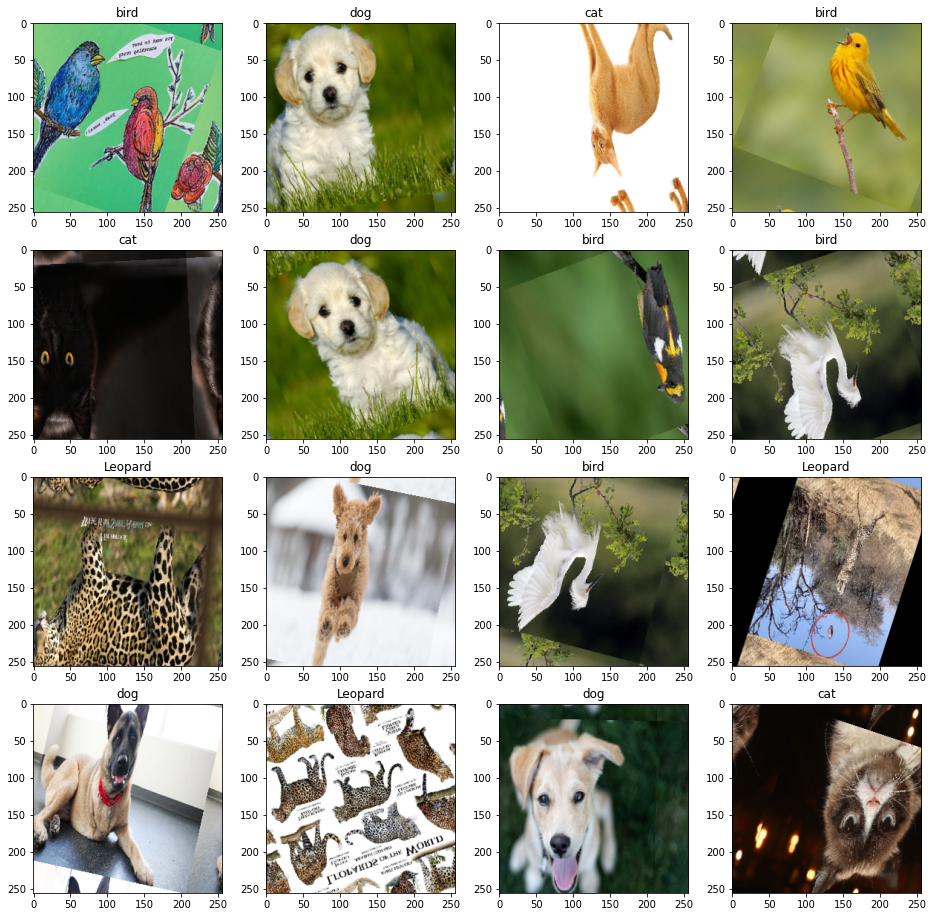

In [172]:

categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
x, y=train_generator.__getitem__(3)

def plot_img(x_train, y_train):
    from matplotlib import pyplot as plt
    fig=plt.figure(figsize=(16, 16))
    columns = 4
    rows = 4
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        img = x_train[i-1]
        plt.imshow(img.astype(np.uint8))
        plt.title(categories[np.argmax(y[i-1])])
    plt.show()
plot_img(x, y)


# Part A: build and train model without using data augmentation

In [14]:
from tensorflow.keras import layers, Sequential, Input, callbacks
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np


In [255]:
def build_model():
  model = Sequential()
  model.add(layers.Conv2D(64, (3,3), input_shape=(256, 256, 3)))
  model.add(layers.Conv2D(32, (3,3), activation='relu'))
  model.add(layers.Conv2D(32, (3,3), activation='relu'))
  model.add(layers.Conv2D(16, (3,3), activation='relu'))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(5, activation='softmax'))
  return model

In [231]:

model = build_model()
loss = 'categorical_crossentropy'
optimizer = 'adam'
model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])


In [232]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_93 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 conv2d_94 (Conv2D)          (None, 252, 252, 32)      18464     
                                                                 
 conv2d_95 (Conv2D)          (None, 250, 250, 32)      9248      
                                                                 
 conv2d_96 (Conv2D)          (None, 248, 248, 16)      4624      
                                                                 
 flatten_23 (Flatten)        (None, 984064)            0         
                                                                 
 dense_46 (Dense)            (None, 128)               125960320 
                                                                 
 dense_47 (Dense)            (None, 5)               

In [233]:
history = model.fit(
    train_wo_agum,
    epochs=25,
    batch_size=batch_size,
    validation_data=validation_generator_wo_agum
    )

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


26/26 [==============================] - 8s 288ms/step - loss: 854.1179 - accuracy: 0.2549 - val_loss: 1.7169 - val_accuracy: 0.1136
Epoch 2/40
26/26 [==============================] - 6s 224ms/step - loss: 0.8694 - accuracy: 0.6869 - val_loss: 1.8144 - val_accuracy: 0.1591
Epoch 3/40
26/26 [==============================] - 6s 219ms/step - loss: 0.3334 - accuracy: 0.9053 - val_loss: 1.7787 - val_accuracy: 0.3864
Epoch 4/40
26/26 [==============================] - 6s 219ms/step - loss: 0.2760 - accuracy: 0.9539 - val_loss: 1.5721 - val_accuracy: 0.2955
Epoch 5/40
26/26 [==============================] - 6s 217ms/step - loss: 0.0490 - accuracy: 0.9879 - val_loss: 4.2743 - val_accuracy: 0.2273
Epoch 6/40
26/26 [==============================] - 6s 221ms/step - loss: 0.0271 - accuracy: 0.9951 - val_loss: 2.8503 - val_accuracy: 0.2727
Epoch 7/40
26/26 [==============================] - 6s 222ms/step - loss: 7.9614e-04 - accuracy: 1.0000 - val_loss: 2.6311 - val_accuracy: 0.3182
Epoch 8/40


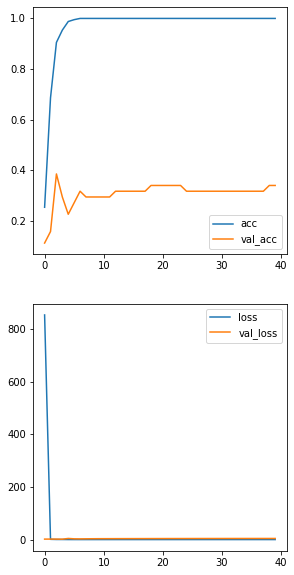

In [240]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(2,2, 1)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.legend(['acc', 'val_acc'], loc='best')

ax = fig.add_subplot(2,2, 3)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.legend(['loss', 'val_loss'], loc='best')

plt.show()

In [241]:
model.evaluate(test_generator, batch_size=batch_size)

55/55 [==============================] - 1s 13ms/step - loss: 2.2336 - accuracy: 0.6000


[2.2335875034332275, 0.6000000238418579]

# Part B: train model using data augmentation

In [15]:
es = callbacks.EarlyStopping(monitor='val_loss', mode='min')

In [256]:

model = build_model()
loss = 'categorical_crossentropy'
optimizer = 'adam'
model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
agu_history = model.fit(
    train_generator,
    epochs=40,
    batch_size=batch_size,
    validation_data=validation_generator,
    callbacks=[callbacks.TensorBoard('logs/with_augmentation'),es]
    )

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/40
26/26 [==============================] - 12s 450ms/step - loss: 517.7046 - accuracy: 0.2136 - val_loss: 1.7239 - val_accuracy: 0.2955
Epoch 2/40
26/26 [==============================] - 11s 432ms/step - loss: 1.6361 - accuracy: 0.2913 - val_loss: 1.6142 - val_accuracy: 0.2045


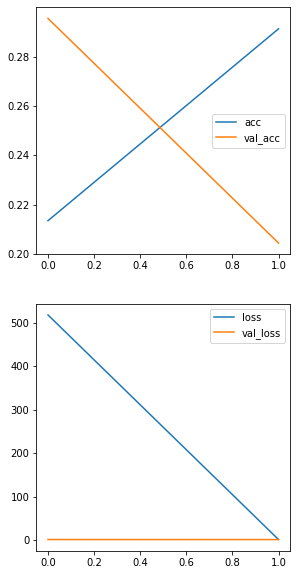

In [257]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(2,2, 1)
ax.plot(agu_history.history['accuracy'])
ax.plot(agu_history.history['val_accuracy'])
ax.legend(['acc', 'val_acc'], loc='best')

ax = fig.add_subplot(2,2, 3)
ax.plot(agu_history.history['loss'])
ax.plot(agu_history.history['val_loss'])
ax.legend(['loss', 'val_loss'], loc='best')

plt.show()

In [258]:
model.evaluate(test_generator, batch_size=batch_size)

55/55 [==============================] - 1s 14ms/step - loss: 1.5941 - accuracy: 0.2545


[1.5941349267959595, 0.2545454502105713]

# Part C: build and train model with dropout

In [16]:
def build_model(rate):
  model = Sequential()
  model.add(layers.Conv2D(64, (3,3), input_shape=(256, 256, 3)))
  model.add(layers.Conv2D(32, (3,3), activation='relu'))
  model.add(layers.Conv2D(32, (3,3), activation='relu'))
  model.add(layers.Conv2D(16, (3,3), activation='relu'))
  model.add(layers.Dropout(rate=rate))

  model.add(layers.Flatten())

  model.add(layers.Dense(128, activation='relu'))

  model.add(layers.Dense(5, activation='softmax'))
  return model

dropout 0.3,0.5,0.7

In [22]:
drop_history = []
summery = []
for rate in [0.3,0.5,0.7]:
  model = build_model(rate)
  summery.append(model.summary())
  loss = 'categorical_crossentropy'
  optimizer = 'adam'
  model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
  drop_history.append(model.fit(
      train_wo_agum,
      epochs=15,
      batch_size=batch_size,
      validation_data=validation_generator_wo_agum,
      # callbacks=[es]
  ))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 252, 252, 32)      18464     
                                                                 
 conv2d_14 (Conv2D)          (None, 250, 250, 32)      9248      
                                                                 
 conv2d_15 (Conv2D)          (None, 248, 248, 16)      4624      
                                                                 
 dropout_3 (Dropout)         (None, 248, 248, 16)      0         
                                                                 
 flatten_3 (Flatten)         (None, 984064)            0         
                                                                 
 dense_6 (Dense)             (None, 128)              

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


19/19 [==============================] - 5s 219ms/step - loss: 433.7517 - accuracy: 0.2397 - val_loss: 1.5695 - val_accuracy: 0.3871
Epoch 2/15
19/19 [==============================] - 4s 203ms/step - loss: 0.8291 - accuracy: 0.7945 - val_loss: 1.5288 - val_accuracy: 0.3871
Epoch 3/15
19/19 [==============================] - 4s 204ms/step - loss: 0.3766 - accuracy: 0.9555 - val_loss: 2.0917 - val_accuracy: 0.4516
Epoch 4/15
19/19 [==============================] - 4s 205ms/step - loss: 0.0575 - accuracy: 1.0000 - val_loss: 3.9662 - val_accuracy: 0.4194
Epoch 5/15
19/19 [==============================] - 4s 205ms/step - loss: 0.0150 - accuracy: 0.9966 - val_loss: 2.6203 - val_accuracy: 0.3871
Epoch 6/15
19/19 [==============================] - 4s 201ms/step - loss: 0.0114 - accuracy: 0.9966 - val_loss: 2.3038 - val_accuracy: 0.3871
Epoch 7/15
19/19 [==============================] - 4s 209ms/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 2.4568 - val_accuracy: 0.3548
Epoch 8/15
19/1

In [261]:
# for i in range(3):
#   print(drop_history[i].summary())

AttributeError: ignored

In [23]:
from matplotlib import pyplot as plt

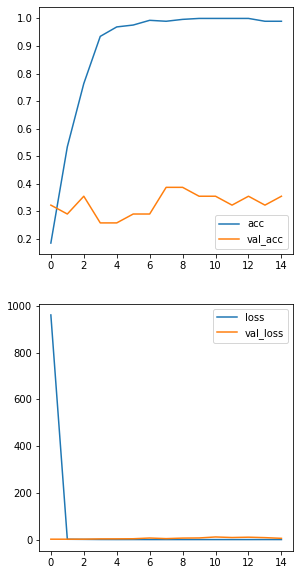

In [27]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(2,2, 1)
ax.plot(drop_history[2].history['accuracy'])
ax.plot(drop_history[2].history['val_accuracy'])
ax.legend(['acc', 'val_acc'], loc='best')

ax = fig.add_subplot(2,2, 3)
ax.plot(drop_history[2].history['loss'])
ax.plot(drop_history[2].history['val_loss'])
ax.legend(['loss', 'val_loss'], loc='best')

plt.show()

In [ ]:
model.evaluate(test_generator, batch_size=BATCH_SIZE)